# Un peu de révisions sur la géométrie affine

## Faisceaux d'hyperplans

On se place dans $E=\mathbb{R}^4$ et on considère les trois hyperplans affines définis par les équations suivantes
$$\begin{cases} (\mathcal{H}_1)&x+2\,y-z+t=3\\ (\mathcal{H}_2)&2\,x-y+3\,z-2\,t=5\\ (\mathcal{H}_3)&2\,x-2\,y+3\,z-t=-1\end{cases}$$
1. Donner une définition de $\mathcal{H}_1$ sous la forme 
$$A_1+\mathrm{Ker}\left(\varphi_1\right)\quad\text{où } A_1\in E\text{ et } \varphi_1\in E^\star$$
puis sous la forme
$$A_1+\mathrm{Vect}\left(\left\{\overrightarrow{u_1},\overrightarrow{u_2},\overrightarrow{u_3}\right\}\right)$$
1. Montrer que les trois hyperplans se coupent suivant une droite $\mathcal{D}$.
1. Soit $\mathcal{H}$ un hyperplan contenant $\mathcal{H}_1\cap \mathcal{H}_2$, quelle forme a l'équation de $\mathcal{H}$ ? Le montrer.
1. Soit $\mathcal{K}$ un hyperplan contenant $\mathcal{D}$, quelle forme a l'équation de $\mathcal{K}$ ? Le montrer.
1. On suppose que $\mathcal{K}$ contient aussi la droite passant par le point $(1,1,1,1)$ et dirigée par le vecteur $(1,-1,1,-1)$. Quelle peut être l'équation de $\mathcal{K}$ ?

**Question 1**
On peut prendre, par exemple
$$A_1=(3,0,0,0)\quad\text{et}\quad\varphi_1\;:\;(x,y,z,t)\longmapsto x+2\,y-z+t$$
Pour trouver les vecteurs $\left(\overrightarrow{u_1},\overrightarrow{u_2},\overrightarrow{u_3}\right)$ il suffit de produire une base de $\mathrm{Ker}(\varphi_1)$ (qui, comme tout hyperplan est de codimension 1 donc, ici, de dimension 3). Par exemple
$$\overrightarrow{u_1}=(2,-1,0,0),\quad \overrightarrow{u_2}=(1,0,1,0),\quad \overrightarrow{u_3}=(1,0,0,-1)$$

**Question 2** Il suffit de résoudre le système des 3 équations à 4 inconnues.

In [1]:
import sympy as sp
sp.init_printing()

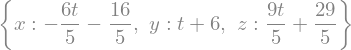

In [2]:
x, y, z, t = sp.symbols('x y z t', real=True)
sp.solve([sp.Eq(x+2*y-z+t, 3), sp.Eq(2*x-y+3*z-2*t, 5),
         sp.Eq(2*x-2*y+3*z-t, -1)], [x, y, z, t])

On a bien une droite $\mathcal{D}$ paramétrée ici par $t$.

**Question 3**
$\varphi_1$ et $\varphi_2$ sont indépendantes (elles ne sont pas proportionnelles) où
$$\varphi_2\;:\;(x,y,z,t)\longmapsto 2\,x-y+3\,z-2\,t$$
D'après le cours, il existe alors $\theta\in\mathbb{R}$ tel que
$$(\mathcal{H})\qquad\qquad \cos(\theta)\,\left(x+2\,y-z+t-3\right)+\sin(\theta)\,\left(2\,x-y+3\,z-2\,t\right)=0$$
ou il existe $(\lambda,\mu)\in\mathbb{R}^2\setminus\{(0,0)\}$ tels que
$$(\mathcal{H})\qquad\qquad \lambda\,\left(x+2\,y-z+t-3\right)+\mu\,\left(2\,x-y+3\,z-2\,t\right)=0$$

**Question 4** Le théorème des faisceaux d'hyperplans nous permet de dire que si $\mathcal{K}\supset \mathcal{D}=\mathcal{H}_1\cap\mathcal{H}_2\cap\mathcal{H}_3$, alors il existe $(a,b,c)\in\mathbb{R}^3\setminus\{(0,0,0)\}$ tels que
$$(\mathcal{K})\qquad\qquad a,(x+2\,y-z+t-3)+b\,(2\,x-y+3\,z-2\,t-5)+c\,(2\,x-2\,y+3\,z-t+1)=0$$

**Question 5** Il suffit d'exprimer que le point donné est dans $\mathcal{K}$ et que le vecteur dirigeant la droite donnée est bien dans la direction de $\mathcal{K}$. 

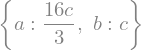

In [3]:
a, b, c = sp.symbols('a b c', real=True)
eq = a*(x+2*y-z+t-3)+b*(2*x-y+3*z-2*t-5)+c*(2*x-2*y+3*z-t+1)
eq0 = a*(x+2*y-z+t)+b*(2*x-y+3*z-2*t)+c*(2*x-2*y+3*z-t)
sp.solve([eq.subs({x: 1, y: 1, z: 1, t: 1}), eq0.subs(
    {x: 1, y: -1, z: 1, t: -1})], [a, b, c])

In [4]:
# Équation de K
sp.Eq(eq.subs(_).subs({c: 3}), 0)

## Applications affines

Soit $\mathcal{E}$ un espace affine de direction $E$, où $E$ est de dimension $n\ge2$. Soit $\phi$ une application affine de $\mathcal{E}$ dans $\mathcal{E}$, on note $\overrightarrow{\phi}$ son application linéaire sous-jacente. 

Soit <span style="color:red">$p\in\mathbb{N}$, $n\ge2$</span> et $(A_i)_{i\in\{1,\ldots,p\}}\in\mathcal{E}^p$ des points de $\mathcal{E}$. On suppose que les vecteurs
$$\left(\overrightarrow{A_1A_2},\ldots,\overrightarrow{A_1A_p}\right) \text{ sont indépendants}$$
1. À quelle(s) condition(s), la donnée des points $\left(\phi\left(A_i\right)\right)_{i\in\{1,\ldots,p\}}$ détermine-t-elle de manière unique l'application $\phi$ ?
1. On appelle *point fixe* de $\phi$, tout point $A$ qui vérifie $\phi(A)=A$. Et on note $\mathrm{Fix}(\phi)$ l'ensemble des points fixes de $\phi$. Montrer que
$$\left[\mathrm{Card}\left(\mathrm{Fix}(\phi)\right)=1\right]\iff\left[\forall \overrightarrow{x}\in E\setminus\left\{\overrightarrow{0}\right\},\; \overrightarrow{\phi}\left(\overrightarrow{x}\right)\ne \overrightarrow{x}\right]$$
1. Faire une fonction `Python` qui prend 6 points au hasard $(A_1,A_2,A_3,B_1,B_2,B_3)$ dans $[0,1]^2$ qui les trace sur un graphique et qui trace aussi l'unique point fixe (quand il existe et est unique) de l'application affine $\phi$ (quand elle existe) qui vérifie
$$\forall k\in\left\{1,2,3\right\},\; \phi(A_k)=B_k$$
1. Déduire une construction géométrique du point fixe.

**Question 1** Une application affine est déterminée par l'image d'un point (par exemple, ici $\phi(A_1)$) et par la donnée de $\overrightarrow{\phi}$. $\phi$ sera donc déterminée de manière unique si $\overrightarrow{\phi}$ l'est. Or, une application linéaire est déterminée de manière unique par la donnée de l'image d'une base. Comme on a 
$$\forall k\in\{2,\ldots,p\},\; \phi(A_k)=\phi(A_1)+\overrightarrow{\phi}\left(\overrightarrow{A_1A_k}\right)$$
$\overrightarrow{\phi}$ sera uniquement déterminée lorsque $\left(\overrightarrow{A_1A_2},\ldots,\overrightarrow{A_1A_p}\right)$ sera une base de $E$. La condition demandée est donc
$$\boxed{p=n+1}$$

**Question 2**
- ($\Rightarrow$) *Par contraposition*. Soit $\overrightarrow{e}\ne\overrightarrow{0}$ tel que $\phi\left(\overrightarrow{e}\right)=\overrightarrow{e}$. Deux cas peuvent alors se produire
    - $\mathrm{Fix}(\phi)=\emptyset$, auquel cas la propriété de gauche est fausse
    - $\mathrm{Fix}(\phi)\ne\emptyset$, soit $A\in\mathrm{Fix}(\phi)$, alors
    $$\phi\left(A+\overrightarrow{e}\right)=\phi(A)+\overrightarrow{\phi}\left(\overrightarrow{e}\right)=A+\overrightarrow{e}$$
    donc $\mathrm{Fix}(\phi)$ a au moins eux éléments (si $\mathbb{K}=\mathbb{R}$ ou $\mathbb{C}$, il y en a une infinité) ; la propriété de gauche est encore fausse.
- ($\Leftarrow$) Sous l'hypothèse donnée sur $\overrightarrow{\phi}$, on sait que $\mathrm{Id}-\overrightarrow{\phi}$ est injective et, comme c'est un endomorphisme de $E$ et que $E$ est de dimension finie, il est inversible. Soit $A\in\mathcal{E}$ un point quelconque, $\Omega$ est un point fixe si, et seulement si,
$$\Omega=\phi(A)+\overrightarrow{\phi}\left(\overrightarrow{A\Omega}\right)$$
Cette équation peut s'écrire
$$\left(\mathrm{Id}_{_E}-\overrightarrow{\phi}\right)\left(\overrightarrow{A\Omega}\right)=\overrightarrow{A\phi(A)}$$
et donc
$$\Omega =A+\left(\mathrm{Id}_{_E}-\overrightarrow{\phi}\right)^{-1}\left(\overrightarrow{A\phi(A)}\right)$$
ce qui montre l'existence et l'unicité de $\Omega$.

**Question 3** On a la relation
$$\forall k\in\{1,2,3\},\; \phi(A_k)=B_k=\phi(A_1)+\overrightarrow{\phi}\left(\overrightarrow{A_1A_k}\right)=B_1+\overrightarrow{\phi}\left(\overrightarrow{A_1A_k}\right)$$
en notant les points $A_k$ sous la forme $(a_k,a'_k)$ et les points $B_k$ sous la forme $(b_k,b'k)$ et la matrice de $\overrightarrow{\phi}$ dans la base canonique 
$$\begin{bmatrix} a&b\\ c&d\end{bmatrix}$$
On obtient les 4 équations
$$\forall k\in\{2,3\},\; \begin{cases} &b_k=b_1+a\,(a_k-a_1)+b\,(a'_k-a'_1)\\
&b'_k=b'_1+c\,(a_k-a_1)+d\,(a'_k-a'_1)\end{cases}$$
Pour trouver le point fixe (s'il existe), il suffit de résoudre alors
$$\begin{cases} &x=b_1+a\,x+b\,y\\ &y=b'_1+c\,x+d\,y\end{cases}$$

In [5]:
from random import random
import matplotlib.pyplot as plt

In [6]:
A1 = (random(), random())
A2 = (random(), random())
A3 = (random(), random())
B1 = (random(), random())
B2 = (random(), random())
B3 = (random(), random())

Text(0.6862035796617535, 0.31703574866804834, '3')

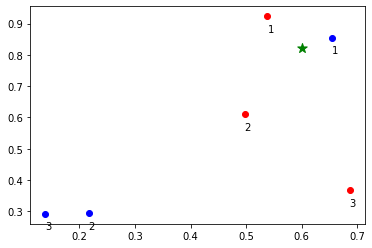

In [7]:
# Calcul de la matrice de ɸ
d = sp.symbols('d', real=True)
res = sp.solve([a*(A2[0]-A1[0])+b*(A2[1]-A1[1])+B1[0]-B2[0],
                a*(A3[0]-A1[0])+b*(A3[1]-A1[1])+B1[0]-B3[0],
                c*(A2[0]-A1[0])+d*(A2[1]-A1[1])+B1[1]-B2[1],
                c*(A3[0]-A1[0])+d*(A3[1]-A1[1])+B1[1]-B3[1]],
               [a, b, c, d])
# Recherche du point fixe
fixe = sp.solve([(a*(x-A1[0])+b*(y-A1[1])+B1[0]-x).subs(res),
                 (c*(x-A1[0])+d*(y-A1[1])+B1[1]-y).subs(res)], [x, y])
plt.scatter([x.subs(fixe)], [y.subs(fixe)], color='green', marker='*', s=100)
# Les points A
plt.scatter([A1[0], A2[0], A3[0]], [A1[1], A2[1], A3[1]], color='blue')
delta = 0.05
plt.text(A1[0], A1[1]-delta, '1')
plt.text(A2[0], A2[1]-delta, '2')
plt.text(A3[0], A3[1]-delta, '3')
# Les points B
plt.scatter([B1[0], B2[0], B3[0]], [B1[1], B2[1], B3[1]], color='red')
plt.text(B1[0], B1[1]-delta, '1')
plt.text(B2[0], B2[1]-delta, '2')
plt.text(B3[0], B3[1]-delta, '3')

**Question 4** Comme $\left(\overrightarrow{A_1A_2},\overrightarrow{A_1A_3}\right)$ est supposée être une base (sinon, on ne détermine pas bien $\phi$), en notant $\Omega$ le point fixe, il existe $(\alpha,\beta)\in\mathbb{R}^2$ tels que
$$\overrightarrow{A_1\Omega}=\alpha.\overrightarrow{A_1A_2}+\beta.\overrightarrow{A_1A_3}$$
ce qui, en appliquant $\overrightarrow{\phi}$ donne aussi
$$\overrightarrow{B_1\Omega}=\alpha.\overrightarrow{B_1B_2}+\beta.\overrightarrow{B_1B_3}$$
et, en soustrayant
$$\overrightarrow{A_1B_1}=\alpha.\left(\overrightarrow{A_1A_2}-\overrightarrow{B_1B_2}\right)+\beta.\left(\overrightarrow{A_1A_3}-\overrightarrow{B_1B_3}\right)$$
Le principe de la construction est donc
1. On décompose (à l'aide de projections) le vecteur $\overrightarrow{A_1B_1}$ dans la base (pourquoi en est-ce une ?)
$$\left(\overrightarrow{A_1A_2}-\overrightarrow{B_1B_2},\overrightarrow{A_1A_3}-\overrightarrow{B_1B_3}\right)$$
1. À partir des vecteurs et à l'aide d'homothéties bien choisies on construit les vecteurs
$$\alpha.\overrightarrow{A_1A_2}\quad\text{et}\quad\beta.\overrightarrow{A_1A_3}$$
1. On construit
$$\Omega=A_1+\alpha.\overrightarrow{A_1A_2}+\beta.\overrightarrow{A_1A_3}$$
*Exercice* Faire la construction sur un outil du genre `Geogebra`.

## Une application : le théorème de Feuerbach

Soit $ABC$ un vrai triangle de $\mathbb{R}^2$ (muni de sa structure euclidienne). On note 
- $H$ l'orthocentre du triangle (point d'intersections des trois hauteurs)
- $P$, $Q$ et $R$ les intersections des hauteurs avec le côté opposé
- $U$, $V$ et $W$ les milieux des côtés du triangle
- $J$, $K$ et $L$ les milieux des segments $[A,H]$, $[B,H]$ et $[C,H]$
1. Montrer, par le calcul que ces neufs points sont sur un même cercle.
1. Déduire du calcul une démonstration mathématique à l'aide de transformations affines bien choisies
![Théorème de Feuerbach (ou des neuf points)](feuerbach-1.png)

**Question 1** Commençons par choisir un repère adapté au problème. Il doit être orthonormé puisqu'on mesure des distances (et on trace des cercles et on fait de l'orthogonalité, etc.). Par exemple
$$A=(0,0),\quad C=(a,0),\quad B=(b,c)$$
Et calculons simplement tous les points.

In [8]:
A = (sp.S(0), sp.S(0))
C = (a, sp.S(0))
B = (b, c)

In [9]:
U = ((B[0]+C[0])/2, (B[1]+C[1])/2)
V = ((A[0]+C[0])/2, (A[1]+C[1])/2)
W = ((B[0]+A[0])/2, (B[1]+A[1])/2)

*Calcul de $H$* C'est l'intersection de deux hauteurs. On a immédiatement
- la hauteur $(BH)$ a pour équation $x=b$
- la hauteur $(AH)$ a pour équation $\langle \overrightarrow{AM}, \overrightarrow{BC}\rangle=0$ donc
$$(a-b)\,x-c\,y=0$$

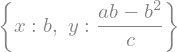

In [10]:
sp.solve([sp.Eq(x, b), sp.Eq((a-b)*x-c*y, 0)], [x, y])

In [11]:
H = (x.subs(_), y.subs(_))

In [12]:
J = ((A[0]+H[0])/2, (A[1]+H[1])/2)
K = ((B[0]+H[0])/2, (B[1]+H[1])/2)
L = ((C[0]+H[0])/2, (C[1]+H[1])/2)

*Calculs de $P$, $Q$ et $R$* On calcule les intersections des droites $\left(A;\overrightarrow{AH}\right)$, etc. avec leur côté opposé.

In [13]:
eqAB = sp.Eq(c*x-b*y, 0)
eqAC = sp.Eq(y, 0)
eqBC = sp.Eq(c*x+(a-b)*y, c*a)

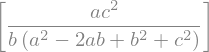

In [14]:
P = (A[0]+t*(H[0]-A[0]), A[1]+t*(H[1]-A[1]))
sp.solve(eqBC.subs({x: P[0], y: P[1]}), t)

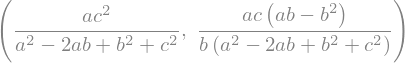

In [15]:
P = (P[0].subs({t: _[0]}), P[1].subs({t: _[0]}))
P

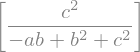

In [16]:
Q = (B[0]+t*(H[0]-B[0]), B[1]+t*(H[1]-B[1]))
sp.solve(eqAC.subs({x: Q[0], y: Q[1]}), t)

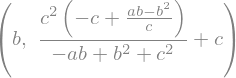

In [17]:
Q = (Q[0].subs({t: _[0]}), Q[1].subs({t: _[0]}))
Q

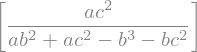

In [18]:
R = (C[0]+t*(H[0]-C[0]), C[1]+t*(H[1]-C[1]))
sp.solve(eqAB.subs({x: R[0], y: R[1]}), t)

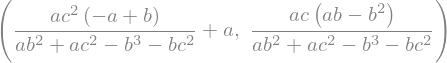

In [19]:
R = (R[0].subs({t: _[0]}), R[1].subs({t: _[0]}))
R

Il reste à tester que ces neuf points sont sur un même cercle.

In [20]:
alpha = sp.IndexedBase('\\alpha')
Cercle = x**2+y**2+alpha[0]*x+alpha[1]*y+alpha[2]

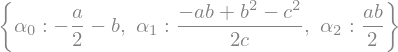

In [21]:
sp.solve([Cercle.subs({x: U[0], y: U[1]}),
         Cercle.subs({x: V[0], y: V[1]}),
         Cercle.subs({x: W[0], y: W[1]})], [alpha[0], alpha[1], alpha[2]])

In [22]:
C0 = Cercle.subs(_)

In [23]:
C0.subs({x: J[0], y: J[1]}).simplify(), C0.subs(
    {x: K[0], y: K[1]}).simplify(), C0.subs({x: L[0], y: L[1]}).simplify()

In [24]:
C0.subs({x: P[0], y: P[1]}).simplify(), C0.subs(
    {x: Q[0], y: Q[1]}).simplify(), C0.subs({x: R[0], y: R[1]}).simplify()

**Question 2** Pour démontrer la propriété, calculons simplement le centre $\Omega$ de ce cercle.

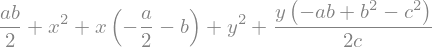

In [25]:
C0

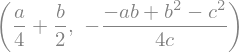

In [26]:
Omega = (-_.coeff(x)/2, -_.coeff(y)/2)
Omega

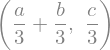

In [27]:
G = ((A[0]+B[0]+C[0])/3, (A[1]+B[1]+C[1])/3)
G

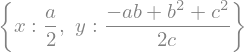

In [28]:
sp.solve([sp.Eq(x, V[0]), sp.Eq(x*(C[0]-B[0])+y*(C[1]-B[1]),
         (x*(C[0]-B[0])+y*(C[1]-B[1])).subs({x: U[0], y: U[1]}))], [x, y])

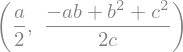

In [29]:
I = (x.subs(_), y.subs(_))
I

In [30]:
eqdte = alpha[0]*x+alpha[1]*y+alpha[2]

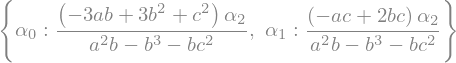

In [31]:
sp.solve([eqdte.subs({x: H[0], y: H[1]}),
         eqdte.subs({x: I[0], y: I[1]})], [alpha[0], alpha[1], alpha[2]])

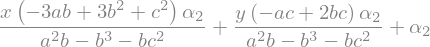

In [32]:
eqdte.subs(_)

In [33]:
eq0 = _
eq0.subs({x: Omega[0], y: Omega[1]}).simplify()

In [34]:
eq0.subs({x: G[0], y: G[1]}).simplify()

Les points $I$, $H$ et $\Omega$ sont sur une même droite (et même $G$ l'isobarycentre de $ABC$ est aussi sur cette droite, qui s'appelle *la droite d'Euler*).

Le cercle que l'on connaît est le cercle circonscrit $\mathcal{C}_{ABC}$, de centre $I$, il faut donc considérer les homothéties qui envoient $I$ sur $\Omega$, deux candidates : $h_2$ homothétie de centre $G$ de rapport $-1/2$, et $h_3$ l'homothétie de centre $H$ de rapport $1/2$. Regardons comment elles agissent sur les points concernés.
1. $h_2$ envoie le pied des médianes sur les sommets (centre de gravité au 2/3 des médianes), donc $$h_2(A)=U,\; h_2(B)=V,\text{ et } h_2(C)=W$$ donc le cercle obtenu (de centre $\Omega=h_2(I)$) contient les points $U$, $V$ et $W$.
1. $h_3$ de rapport $1/2$ vérifie clairement $$h_3(A)=J,\; h_3(B)=K \text{ et } h_3(C)=R$$ donc le cercle obtenu (le même, car il a même centre et même rayon, moitié du rayon du cercle circonscrit) contient $J$, $K$ et $L$.
1. Pour obtenir les pieds des hauteurs, il convient de faire un dessin
![Pieds des hauteurs](feuerbach-cor1.png)
Comme $\Omega$ est au milieu de $H$ et $I$, on a immédiatement que $\Omega U=\Omega P$. Les points $P$, $Q$ et $R$ sont donc aussi sur le cercle. (On peut, pour rester dans l'esprit transformation faire une symétrie par rapport à la droite passant par $\Omega$ orthogonale à $(AB)$).